In [7]:
import os
import cv2
import pandas
import random
from PIL import Image
import matplotlib.patches as patches
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt

processed_annotations = {}

### Process VoTT CSV 
Image Coordinates are not normalized when generated via VoTT. We perform nromalizing and image augmentation here if needed


```
Sample VoTT CSV
---------------
"1.jpg",534.601818534101,87.26120283018868,589.0221158104517,124.70518867924528,"birds"
"1.jpg",628.865284543844,90.43926886792454,695.8345881310894,120.29186320754718,"birds"
"1.jpg",429.31633359167404,68.49646226415095,480.1579384410983,100.02063679245283,"birds"
"1.jpg",381.2280225863596,108.60259433962266,431.424047829938,132.80955188679246,"birds"
```

In [3]:
def ProcessVoTTCSV(data_path, csv_path, class_dict, output_filename):
    # Open File
    output_file  = open(output_filename, "w")
    vott_csv     = open(csv_path, "r")
    
    # Variables
    prev_img     = None
    curr_img     = None
    unique_ann   = 0
    
    
    for annotation in vott_csv:
        # Parse Data for Pre-processing
        img_file, min_x, min_y, max_x, max_y, bbox_class = annotation.rstrip().split(",")
        img_file   = img_file.strip('\"')
        bbox_class = bbox_class.strip('\"')
        
        unique_ann += 1
        
        # Calcualte Normalized Coordinates
        curr_img = Image.open(data_path + img_file)
        
        width, height = curr_img.size
        
        # Cast Data
        min_x = float(min_x)
        min_y = float(min_y)
        max_x = float(max_x)
        max_y = float(max_y)
        
        min_x_norm = min_x / width
        max_x_norm = max_x / width
        min_y_norm = min_y / height
        max_y_norm = max_y / height
        
        class_idx = class_dict[bbox_class]
        
        # Write and Record
        if img_file not in processed_annotations:
            processed_annotations[img_file] = list()
        processed_annotations[img_file].append((class_idx, min_x_norm, min_y_norm, max_x_norm, max_y_norm))
        output_file.write("{} {} {} {} {} {}\n".format(img_file, class_idx, min_x_norm, min_y_norm, max_x_norm, max_y_norm))
    
    # Print Statistics
    print("Processed {} Annotations".format(unique_ann))
    
    # Close Files
    output_file.close()
    vott_csv.close()
        

In [4]:
## Execute Processing with Dictionary
class_idx_map = {"birds" : 2}

ProcessVoTTCSV(                                         \
    data_path  = "/Users/kace/Lab/Sandbox/Tesla/Tensorflow/Transfer Learning/new_bird_data/bird_set_1/",                 \
    csv_path   = "/Users/kace/Lab/Sandbox/Tesla/Tensorflow/Transfer Learning/new_bird_data/bird_set_1/annotation.csv", \
    class_dict = class_idx_map,                        \
    output_filename = "/Users/kace/Lab/Sandbox/Tesla/Tensorflow/Transfer Learning/new_bird_data/bird_set_1/processed_annotations.csv"
)

Processed 594 Annotations


### Check Random Bounding Boxes 
```
1. Randomly select various images
2. Render bounding boxes
3. Inspect
4. Profit
```

Processing : zzzzz_(43).jpg


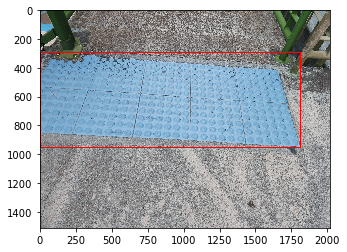

In [20]:
# Load Processed Annotations
annotations = open("/Users/Work/Documents/Conversion/data/output.txt", "r")
processed_annotations = {}
for data in annotations:
    img_file, min_x_norm, min_y_norm, max_x_norm, max_y_norm, class_idx= data.rstrip().split(" ")
    if img_file not in processed_annotations:
            processed_annotations[img_file] = list()
    processed_annotations[img_file].append((int(class_idx), float(min_x_norm), float(min_y_norm), float(max_x_norm), float(max_y_norm)))

# Project Specific Labels
labels = ['0', '1']

# Get Random Image
img_file = random.choice(list(processed_annotations))
print("Processing : " + img_file)
image_file_path = "/Users/Work/Documents/Conversion/data/dataset/" + img_file

# Read Image File
img = cv2.imread(image_file_path)
height, width, channels = img.shape
fig, ax = plt.subplots(1)

# Read Annotations
annotations = processed_annotations[img_file]
for annotation in annotations:
    # Extract Annotation
    class_idx, x_min_norm, y_min_norm, x_max_norm, y_max_norm = annotation
    
    # Calculate and Draw Bounding Boxes
    bbox_left   = int(width  * x_min_norm)
    bbox_top    = int(height * y_min_norm)
    bbox_width  = int((x_max_norm - x_min_norm) * width)
    bbox_height = int((y_max_norm - y_min_norm) * height)
    plt.text(bbox_left, bbox_top - 10, labels[class_idx - 1])
    
    # Create a Rectangle patch
    rect = patches.Rectangle((bbox_left, bbox_top), bbox_width, bbox_height, linewidth=1, edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    
# Add the patch to the Axes
ax.imshow(img)
plt.show()
    